# EcoFOCIpy ADCP QC - 19CKP-1A

- mostly remove >100 cm/s flows in u/v


In [2]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [3]:
xdf = xa.load_dataset('19ckp1a_0035m.nc')

In [4]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 9385, depth: 22)
Coordinates:
  * time             (time) datetime64[ns] 2019-08-18T16:00:00 ... 2020-09-12...
  * depth            (depth) float64 -10.0 -8.0 -6.0 -4.0 ... 28.0 30.0 32.0
  * latitude         (latitude) float64 70.84
  * longitude        (longitude) float64 -163.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan ... 4.905
    v_curr_comp      (latitude, longitude, time, depth) float64 nan ... 7.949
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... 1.2
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... -0.5
    agc1             (latitude, longitude, time, depth) float64 nan ... 100.0
    agc2             (latitude, longitude, time, depth) float64 nan ... 111.0
    agc3             (latitude, longitude, time, depth) float64 nan ... 110.0
    agc4             (latitude, longitude, time, depth) float64 nan ... 116.0
Attributes: (12/13)
    Latitude_DegMMddW:                      70 50.329 N
    Longitude_DegMMddN:                     163 7.698 W
    MooringID:                              19CKP-1A
    platform_deployment_date:               2019-08-18T15:00:34Z
    platform_deployment_cruise_name:        OS1901
    platform_recovery_date:                 2020-09-12T16:52:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  RCM above round cage on chains an...
    WaterDepth:                             45.6
    date_created:                           2021-09-03T12:29:51Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [5]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

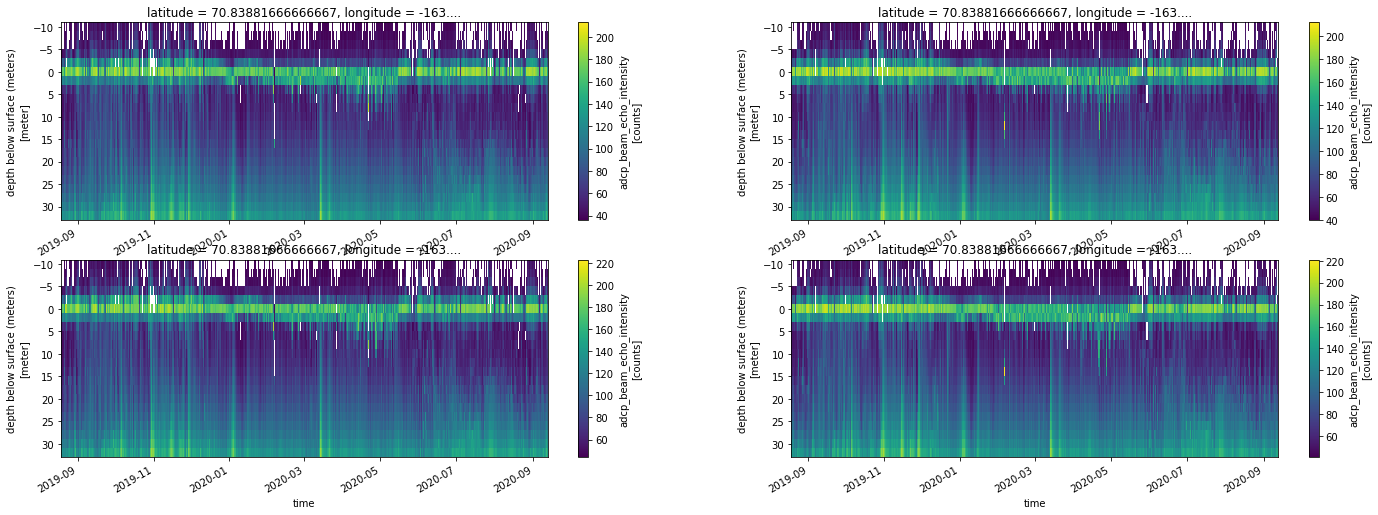

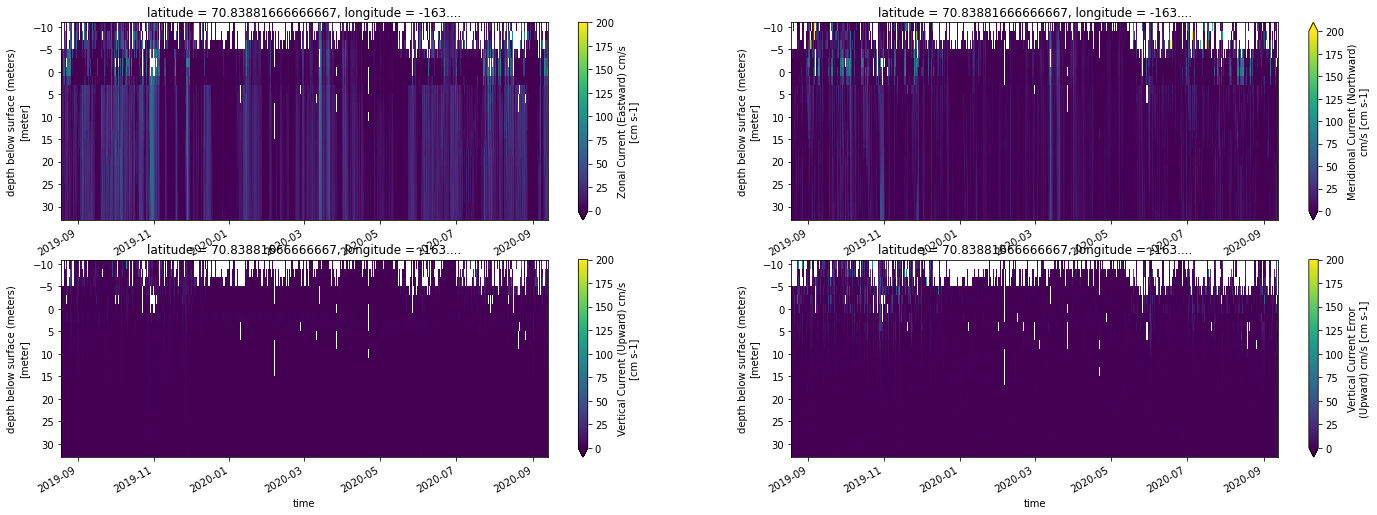

In [6]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [7]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

In [15]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H') #use 2H to fill all up to but not including 2hr gaps (so for hourly data thats just 1hr fills)

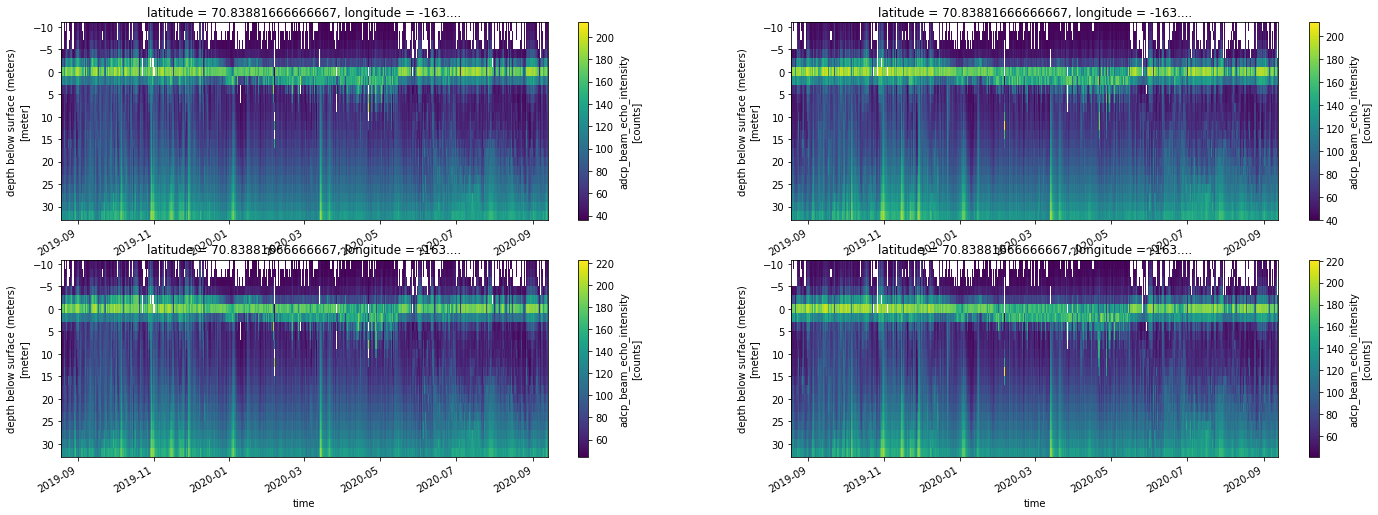

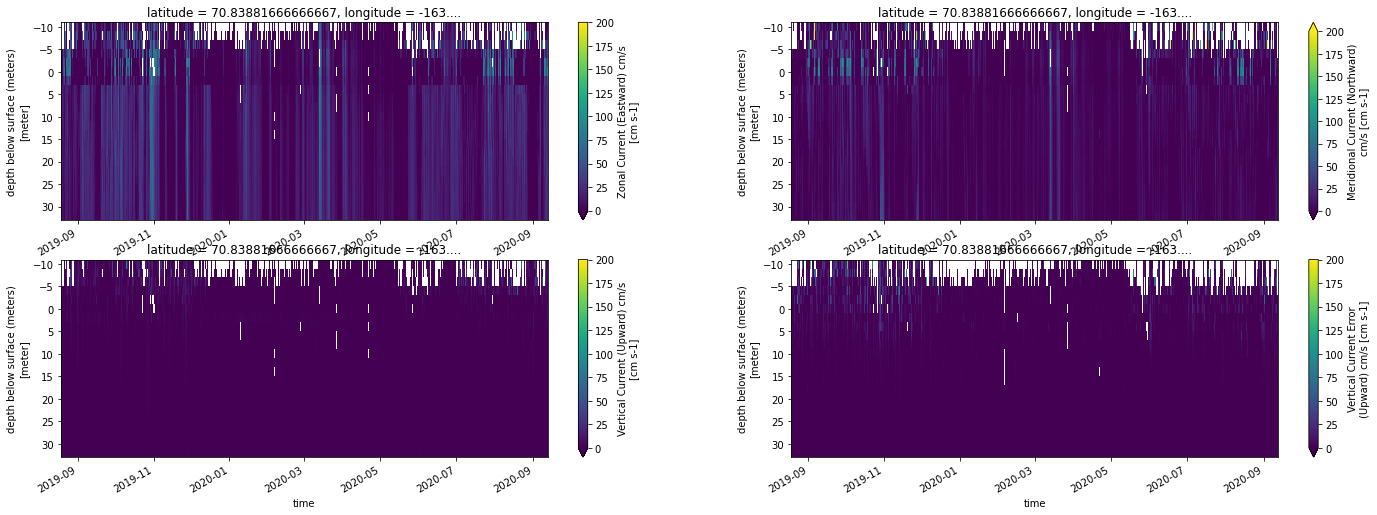

In [14]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [10]:
ixdf.to_netcdf('19ckp1a_0035m.QCd.nc')